In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline 

In [66]:
unit = pd.read_csv(r'E:\ds chall\data-science-challenge-master\data\train\unit0000_rms.csv')
alarm = pd.read_csv(r'E:\ds chall\data-science-challenge-master\data\train\unit0000_alarms.csv')

In [68]:
# Reading just one file to get started with
unit.head(15)
alarm.head(5)

,2003-12-15 19:18:56.526325850,warning
0,2003-12-15 23:29:11.344610850,warning
1,2003-12-17 16:26:26.782823329,warning
2,2003-12-18 02:21:51.445540122,warning
3,2004-01-04 17:16:12.501831699,warning
4,2004-01-18 08:44:36.877231277,warning


In [60]:
unit.describe()

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
count,9.171500e+04,9.171500e+04,9.171500e+04,9.171500e+04,9.171500e+04
mean,-8.111152e+46,-4.431337e+60,-1.387827e+56,-6.640742e+69,-1.937422e+48
std,2.456380e+49,1.903274e+63,4.202968e+58,2.011115e+72,5.867349e+50
min,-7.439020e+51,-5.565298e+65,-1.272847e+61,-6.090557e+74,-1.776896e+53
25%,1.017725e+03,2.311319e+02,3.239347e+01,1.179731e+02,6.489677e+01
50%,1.066347e+03,2.667104e+02,3.944687e+01,1.564521e+02,7.799157e+01
75%,1.106721e+03,2.993994e+02,4.607173e+01,1.978223e+02,9.086132e+01
max,7.978110e+44,1.500194e+65,1.555360e+55,3.117856e+55,1.710299e+40


In [52]:
unit.dtypes

timestamp         object
rpm              float64
motor_voltage    float64
motor_current    float64
motor_temp       float64
inlet_temp       float64
dtype: object

In [54]:
# Converting the timestamp to Datetime 
unit.timestamp = pd.to_datetime(unit.timestamp)
unit.set_index('timestamp', inplace=True)

In [55]:
unit_sca = preprocessing.scale(unit)

C:\Users\Praneeth Tamvada\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [56]:
unit.dtypes

rpm              float64
motor_voltage    float64
motor_current    float64
motor_temp       float64
inlet_temp       float64
dtype: object

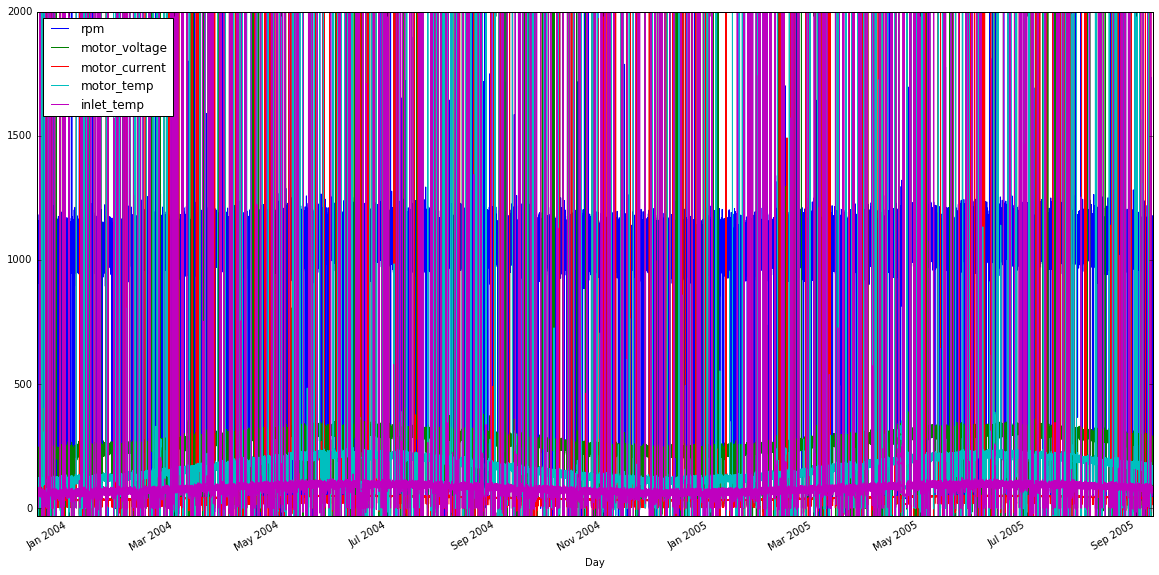

In [65]:
unit.plot(figsize=(20,10), ylim=(-30, 2000))
plt.xlabel('Day', fontsize=10);

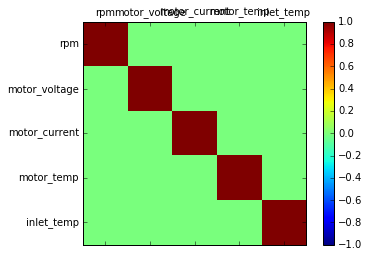

In [58]:
names = ['rpm','motor_voltage','motor_current','motor_temp','inlet_temp']
correlations = unit.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [59]:
unit.corr()

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
rpm,1.000000,-0.000008,-0.000011,-0.000011,-0.000011
motor_voltage,-0.000008,1.000000,-0.000008,-0.000008,-0.000008
motor_current,-0.000011,-0.000008,1.000000,-0.000011,-0.000011
motor_temp,-0.000011,-0.000008,-0.000011,1.000000,-0.000011
inlet_temp,-0.000011,-0.000008,-0.000011,-0.000011,1.000000


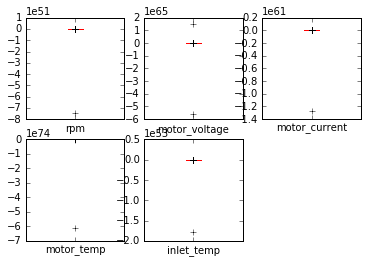

In [29]:
#Box Plots


# Box and Whisker Plots

names = ['rpm', 'motor_voltage', 'motor_current', 'motor_temp', 'inlet_temp']

unit.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

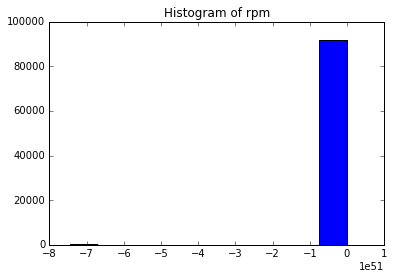

In [43]:
#See the distributions of variables. We can also see noises through histograms
plt.hist(unit['rpm'])  # arguments are passed to np.histogram
plt.title("Histogram of rpm")
plt.show()

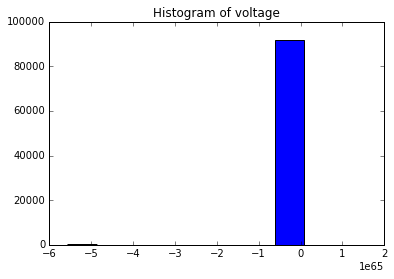

In [44]:
plt.hist(unit['motor_voltage'])  # arguments are passed to np.histogram
plt.title("Histogram of voltage")
plt.show()